In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [28]:
topdir = "../../data/Run7/"
datasets = ["cosmics-endofrun/", "ds01/","ds02/","ds03/", "ds04/","ds05/","ds06/","ds07/",\
        "ds08/","ds09/","ds10/","ds11/","filling/", "room-temp-dark-noise/"]

ds_single = "cosmics-endofrun/"
config = "../configs/run7_config.yaml"

In [29]:
#load the dataset object for the single file selected
ds = Dataset.Dataset(topdir+ds_single, config)

no ramp file present at ../../data/Run7/cosmics-endofrun/ramp.txt, leaving it empty
no g-events-file present at ../../data/Run7/cosmics-endofrun/g_events.txt, leaving it empty
No ramp data in this dataset
Problem! Found no AD2 files with prefix 'prereduced*.p' in ../../data/Run7/cosmics-endofrun/


In [31]:
ds.reduce_data()
print(ds.reduced_df.columns)
pickle.dump([ds.reduced_df], open(topdir+ds_single+"reduced.p", "wb"))

Reducing struck data
Reducing charge data
Reduction took 16.651764 seconds
Index(['ch2 amp', 'ch2 full integral', 'ch2 baseline', 'ch2 postbaseline',
       'ch2 noise', 'ch2 seconds', 'ch2 nanoseconds', 'ch2 n peaks', 'ch2 hv',
       'ch2 field', 'ch2 charge', 'ch2 energy', 'ch2 filename', 'ch2 evidx',
       'ch3 amp', 'ch3 full integral', 'ch3 baseline', 'ch3 postbaseline',
       'ch3 noise', 'ch3 seconds', 'ch3 nanoseconds', 'ch3 n peaks', 'ch3 hv',
       'ch3 field', 'ch3 charge', 'ch3 energy', 'ch3 filename', 'ch3 evidx',
       'ch0 amp', 'ch0 afterpulse integral', 'ch0 trigger integral',
       'ch0 baseline', 'ch0 postbaseline', 'ch0 noise', 'ch0 seconds',
       'ch0 nanoseconds', 'ch0 hv', 'ch0 field', 'ch0 filename', 'ch0 evidx',
       'ch1 amp', 'ch1 afterpulse integral', 'ch1 trigger integral',
       'ch1 baseline', 'ch1 postbaseline', 'ch1 noise', 'ch1 seconds',
       'ch1 nanoseconds', 'ch1 hv', 'ch1 field', 'ch1 filename', 'ch1 evidx'],
      dtype='object')


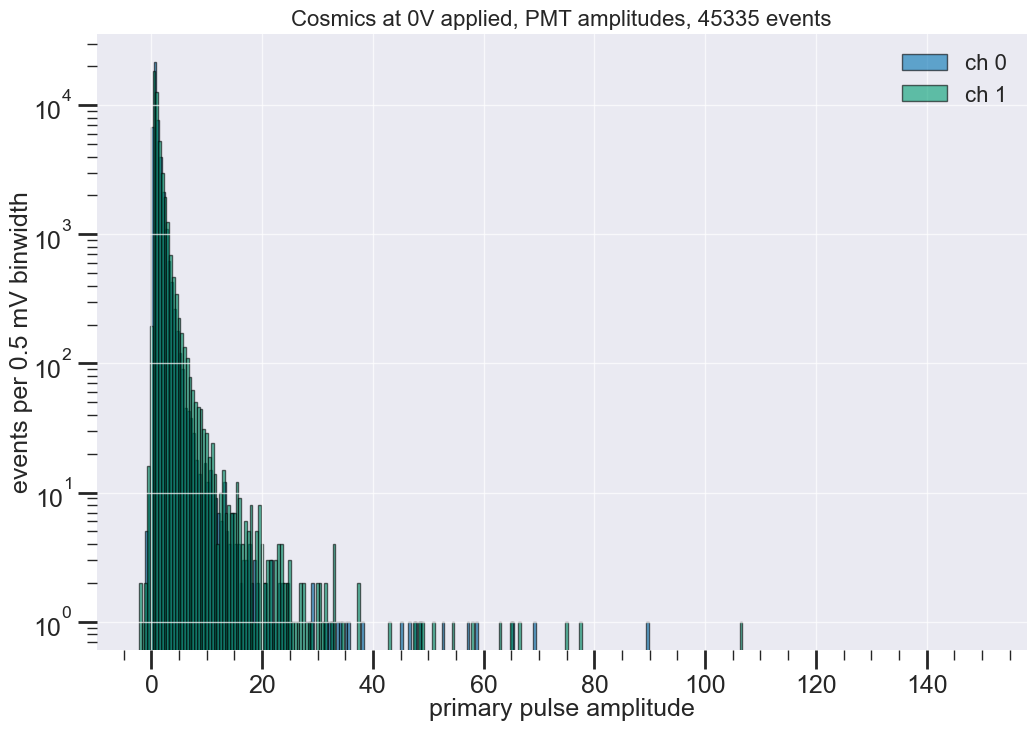

In [35]:
d = ds.reduced_df

fig, ax = plt.subplots()
h = np.array(d["ch0 trigger integral"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 0", alpha=0.6)

h = np.array(d["ch1 trigger integral"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 1", alpha=0.6)

ax.legend()
ax.set_xlabel("primary pulse amplitude")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("Cosmics at 0V applied, PMT amplitudes, {} events".format(len(d.index)))
ax.set_yscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


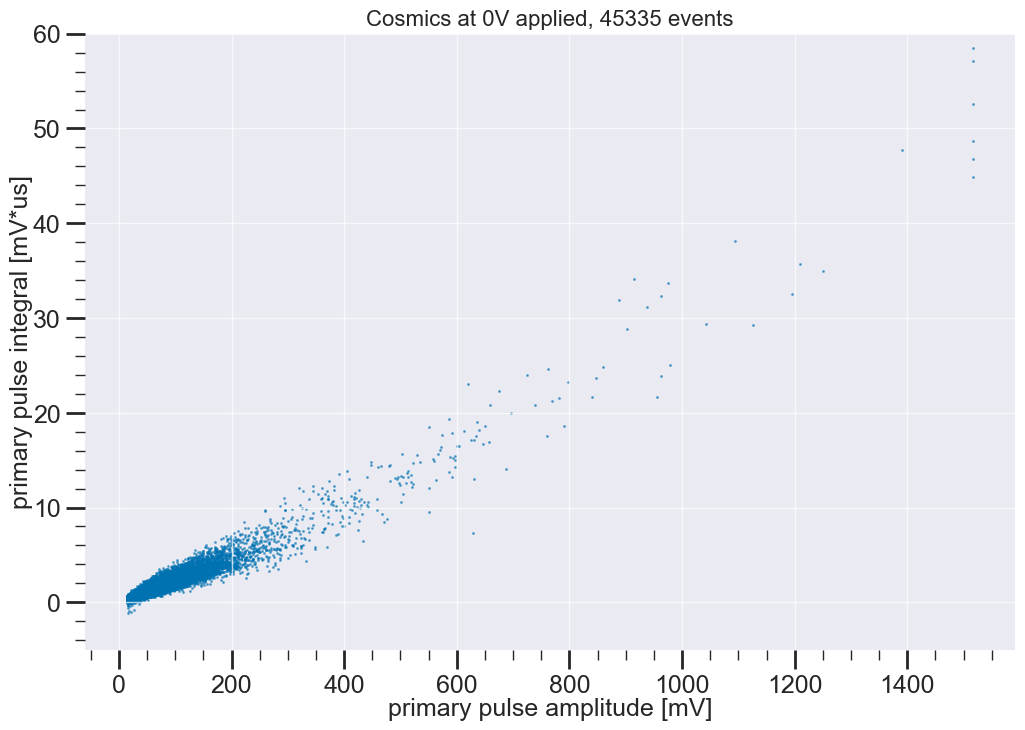

In [37]:
d = ds.reduced_df

fig, ax = plt.subplots()
h1 = np.array(d["ch0 trigger integral"])
h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.5, s=5)

ax.legend()
ax.set_ylim([-5, 60])
ax.set_xlabel("primary pulse amplitude [mV]")
ax.set_ylabel("primary pulse integral [mV*us]")
ax.set_title("Cosmics at 0V applied, {} events".format(len(h1)))
#ax.set_yscale('log')
plt.show()

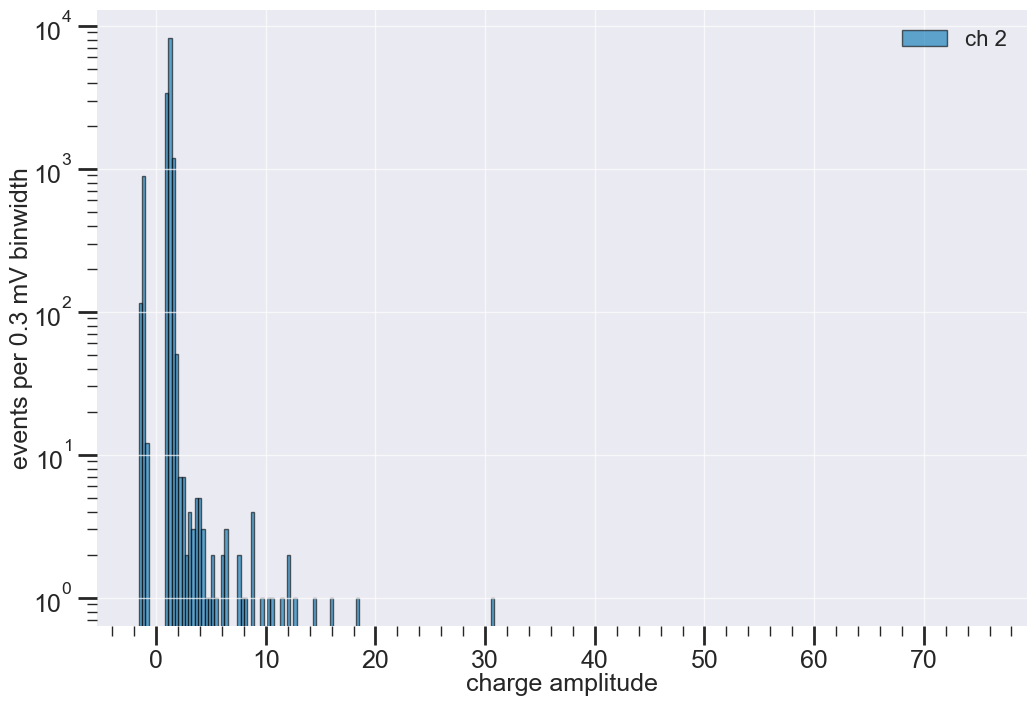

In [50]:
d = ds.reduced_df
fig, ax = plt.subplots()
h = np.array(d["ch2 amp"])
binwidth = 0.3 #mV
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge amplitude")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()

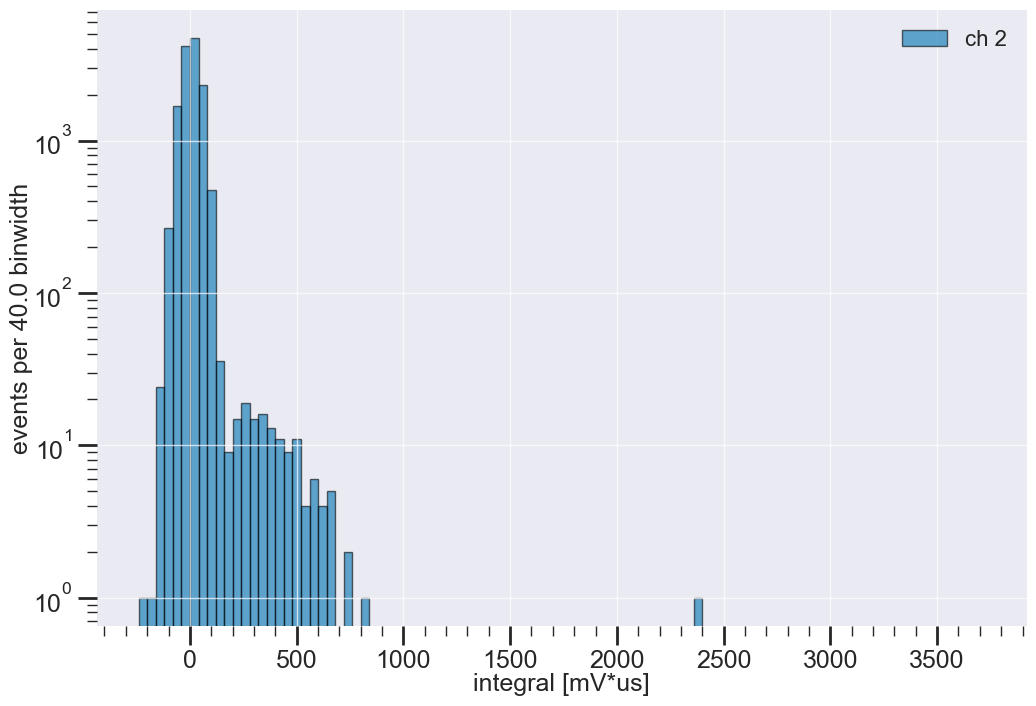

In [57]:
d = ds.reduced_df
cut = (d["ch2 n peaks"] == 0)
dd = d[cut]
fig, ax = plt.subplots()
h = np.array(dd["ch2 full integral"])
binwidth = 40 #mV*us
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("integral [mV*us]")
ax.set_ylabel("events per {:.1f} binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()

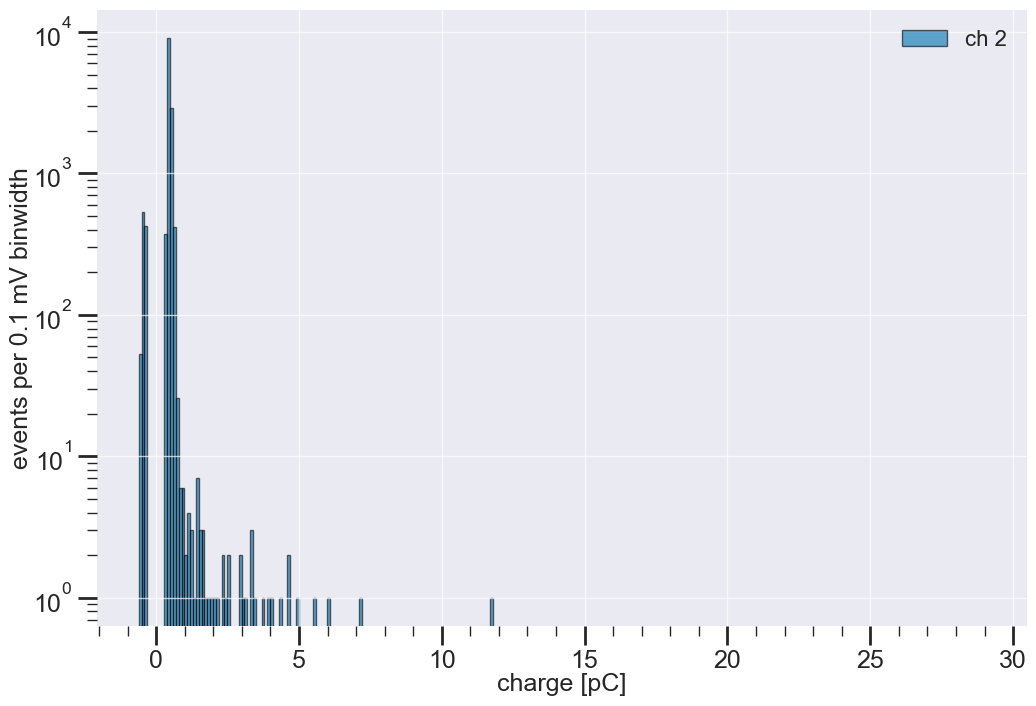

In [11]:
d = pickle.load(open("ds11_temp.p", "rb"))[0]
d = ds.reduced_df
fig, ax = plt.subplots()
h = np.array(d["ch2 charge"])
binwidth = 0.1 #pC
bins = np.arange(min(h), max(h), binwidth)
ax.hist(h, bins=bins, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge [pC]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_yscale('log')
plt.show()



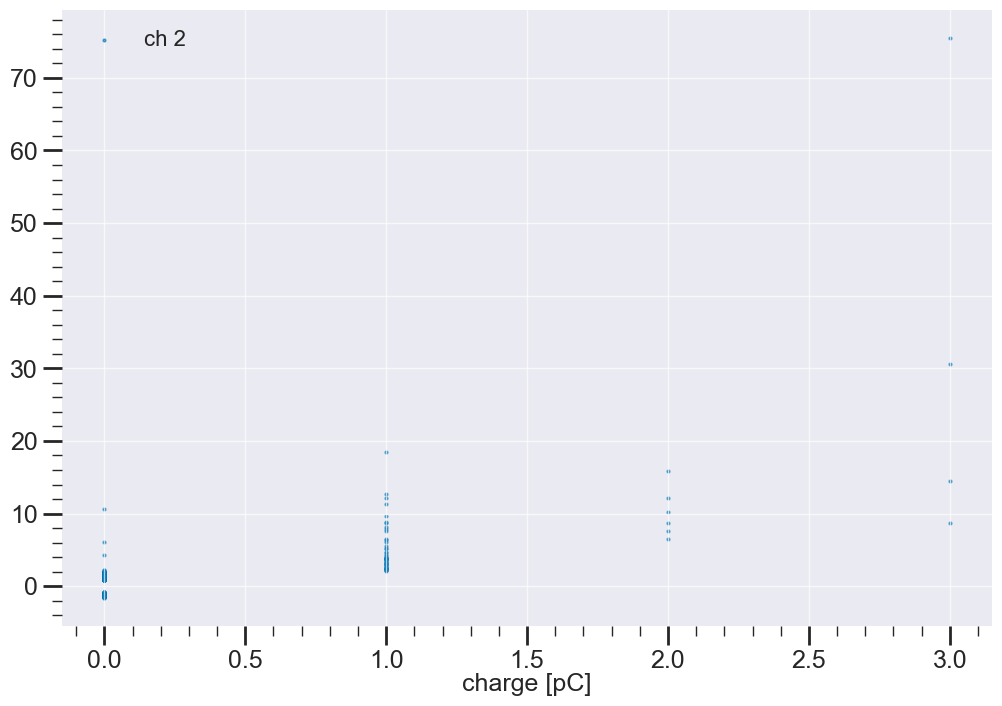

In [14]:
d = pickle.load(open("ds11_temp.p", "rb"))[0]
d = ds.reduced_df
fig, ax = plt.subplots()
n = np.array(d["ch2 n peaks"])
amp = np.array(d["ch2 amp"])
ax.scatter(n, amp, label="ch 2", alpha=0.6)

ax.legend()
ax.set_xlabel("charge [pC]")
#ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
#ax.set_yscale('log')
plt.show()



# Plotter for waveforms after making cuts

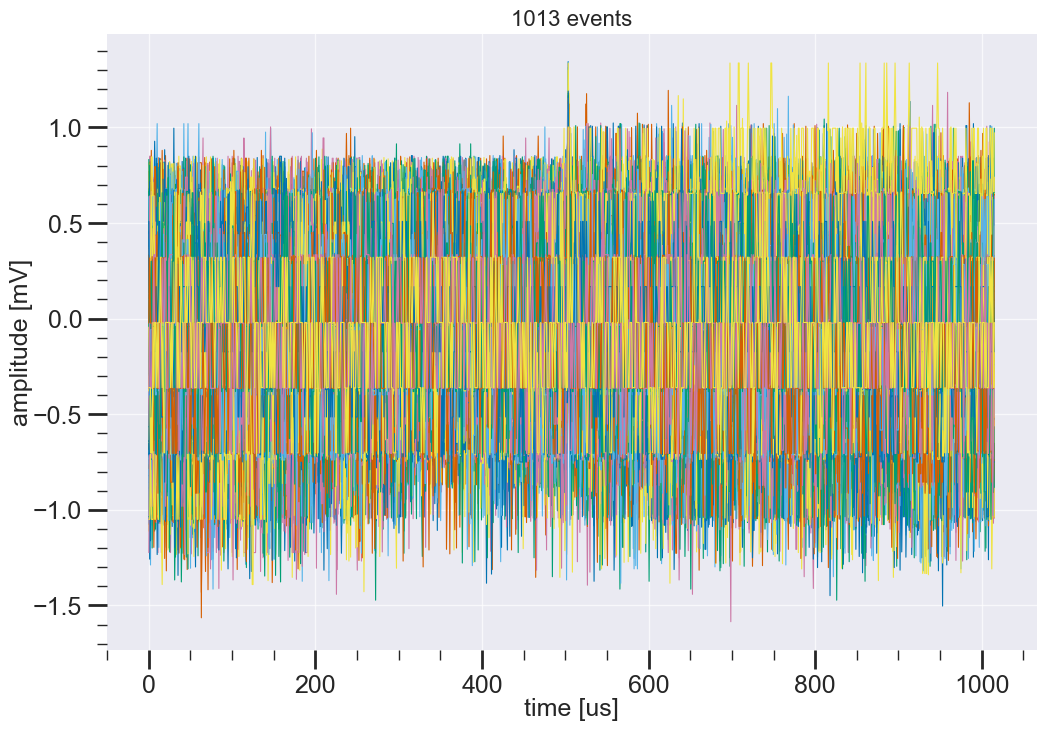

In [12]:
d = ds.reduced_df
cut = (d["ch2 charge"] < 0)
dd = d[cut]
filenames_set = list(set(list(dd["ch2 filename"])))
filenames = list(dd["ch2 filename"])
evidx = list(dd["ch2 evidx"])

overlay = True

if(overlay):
    fig, ax = plt.subplots()
for f in filenames_set:
    df, date = pickle.load(open(f, "rb"))
    for i in range(len(evidx)):
        red_row = dd.iloc[i]
        if(filenames[i] == f):
            event = df.iloc[evidx[i]]
            if(overlay):
                ds.plot_charge(event, ax=ax)
            else:
                ds.plot_charge(event)
                plt.show()
if(overlay):
    ax.set_title("{:d} events".format(len(evidx)))
    plt.show()




# Moving to the full reduced data frame, combined from the full run

In [17]:
topdirs = {5:"../../data/Run5/", 6:"../../data/Run6/", 7:"../../data/Run7/"}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n])


In [18]:
#load data into mem if you want
for n, ana in anas.items():
    ana.load_dataframe()

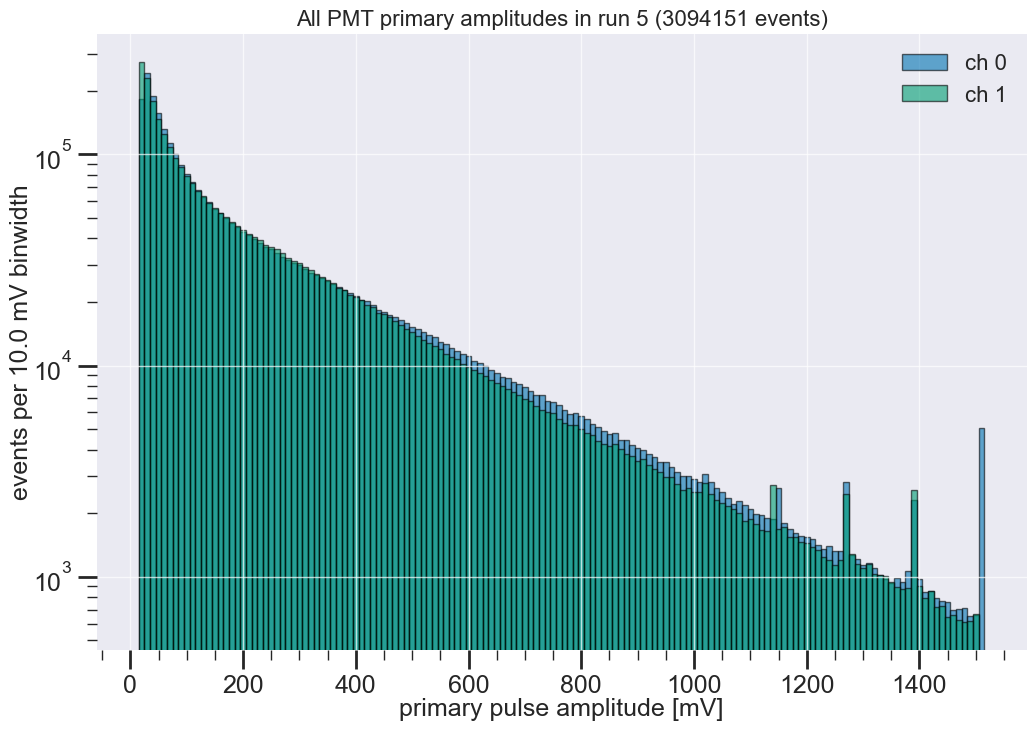

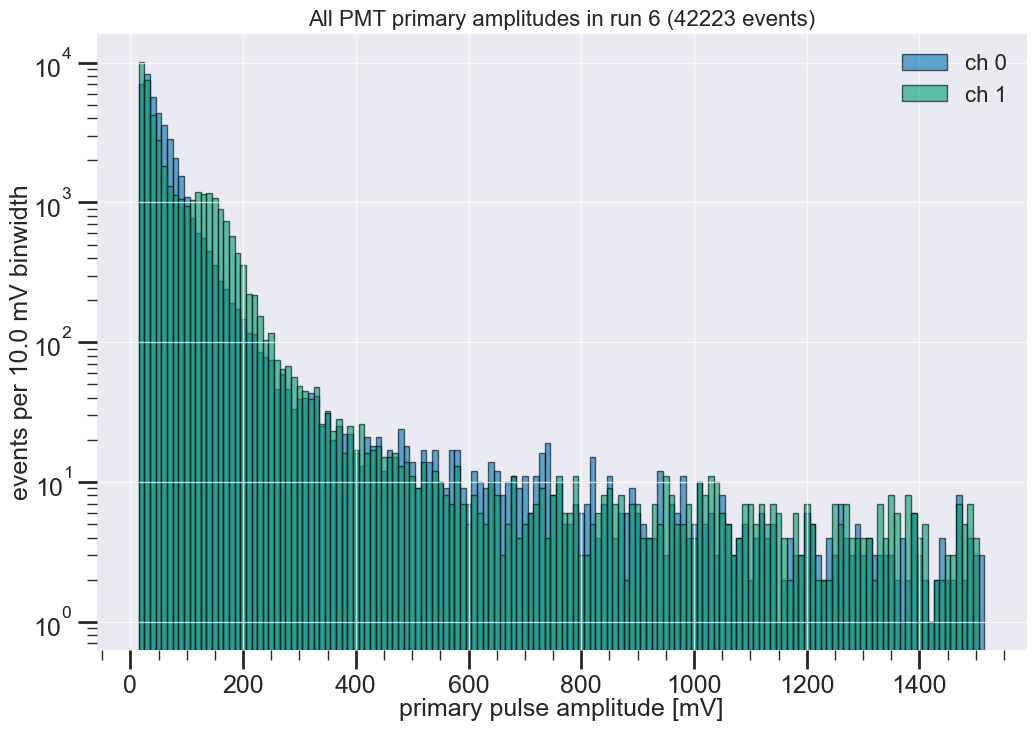

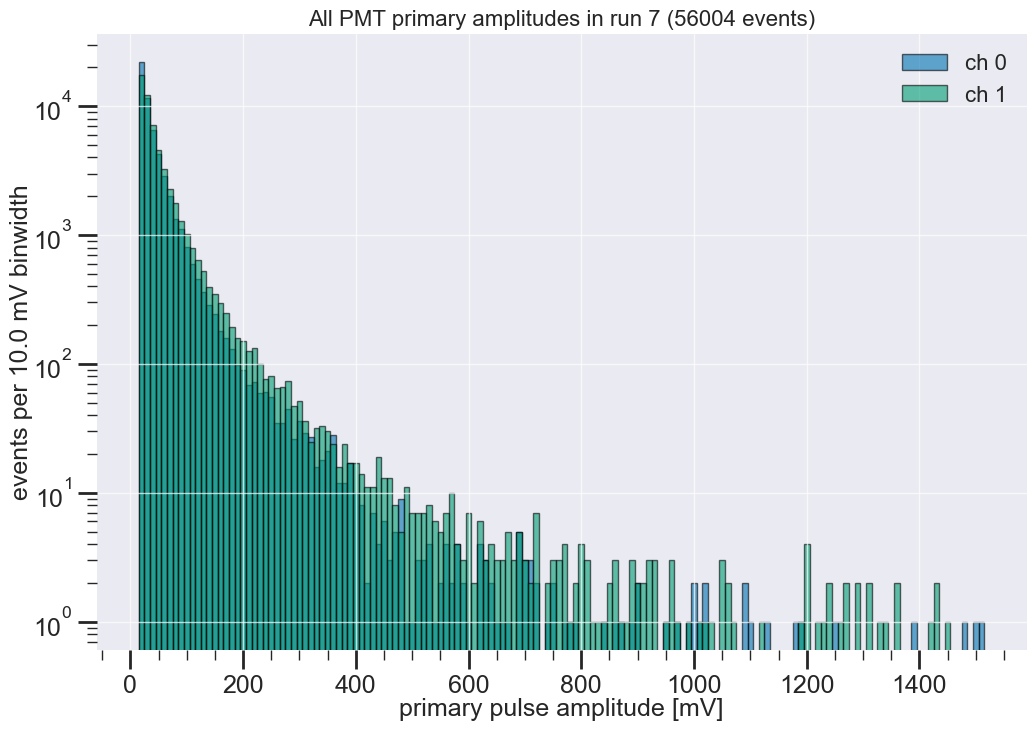

In [10]:
#reproduce some of the plots above
for run, ana in anas.items():
    d = ana.df
    fig, ax = plt.subplots()
    h = np.array(d["ch0 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 0", alpha=0.6)

    h = np.array(d["ch1 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 1", alpha=0.6)

    ax.legend()
    ax.set_xlabel("primary pulse amplitude [mV]")
    ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
    ax.set_title("All PMT primary amplitudes in run {:d} ({:d} events)".format(run, len(h)))
    ax.set_yscale('log')
    plt.show()

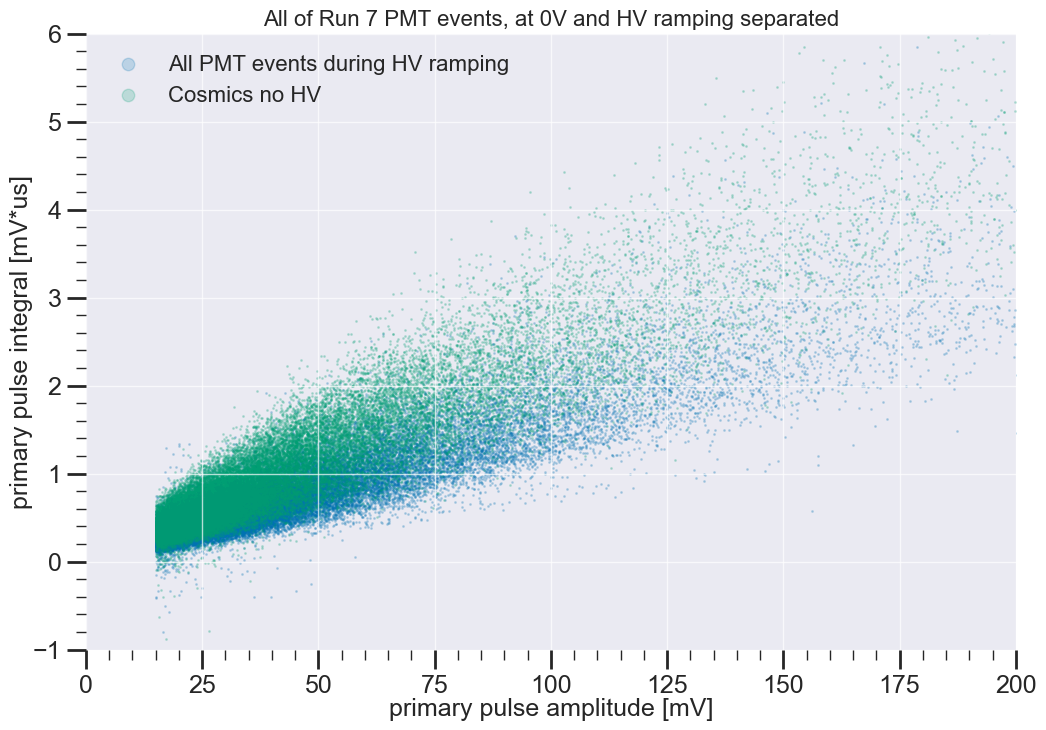

In [49]:
d = anas[7].df

fig, ax = plt.subplots()
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="All PMT events during HV ramping")

d = ds.reduced_df
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="Cosmics no HV")


ax.legend(markerscale=8)
ax.set_ylim([-1, 6])
ax.set_xlim([0, 200])
ax.set_xlabel("primary pulse amplitude [mV]")
ax.set_ylabel("primary pulse integral [mV*us]")
ax.set_title("All of Run 7 PMT events, at 0V and HV ramping separated")
#ax.set_yscale('log')
plt.show()

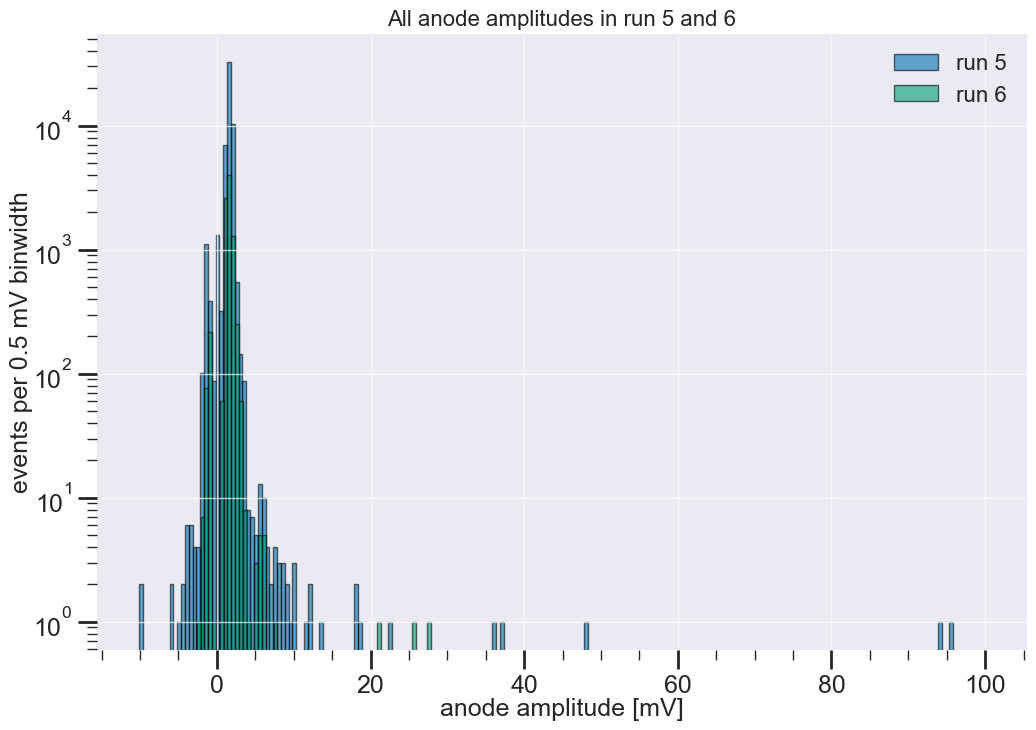

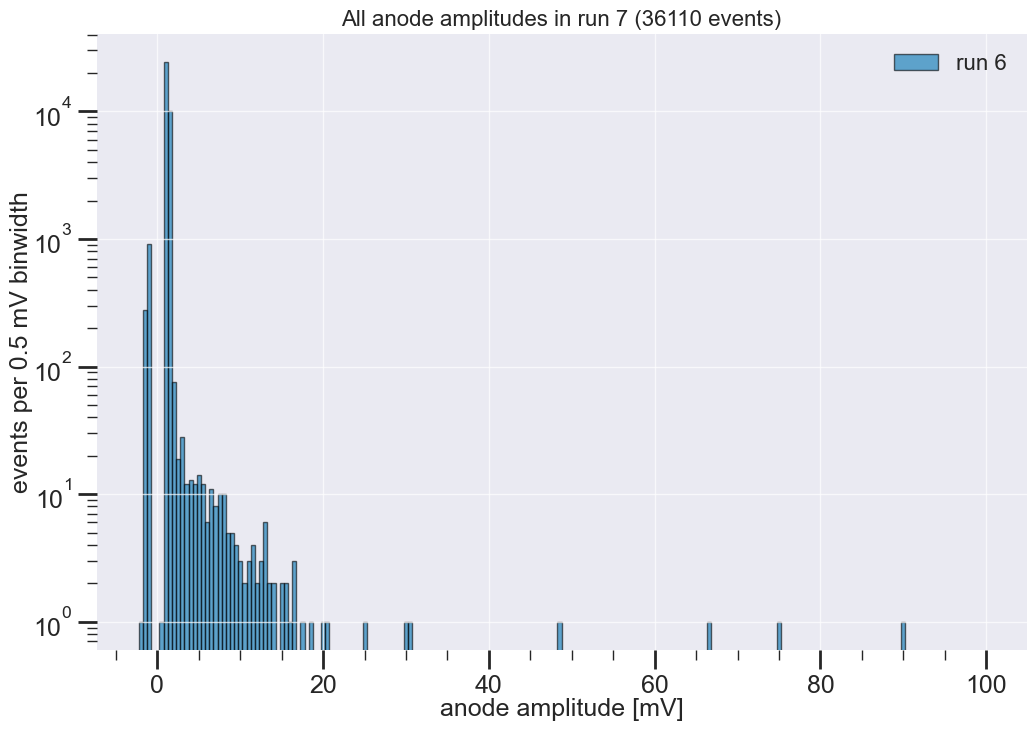

In [51]:

fig, ax = plt.subplots()
#amplitude of charge channels
d = anas[5].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 5", alpha=0.6)
d = anas[6].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 6", alpha=0.6)

ax.legend()
ax.set_xlabel("anode amplitude [mV]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("All anode amplitudes in run 5 and 6".format(run, len(h)))
ax.set_yscale('log')
plt.show()


fig, ax = plt.subplots()
d = anas[7].df
h = np.array(d["ch3 amp"])
h = h[~np.equal(h, None)]
binwidth = 0.5 #mV
#protect against huge bounds and misreconstructed amplitudes
bins = np.arange(min(h), 100, binwidth)
ax.hist(h, bins=bins, label="run 6", alpha=0.6)

ax.legend()
ax.set_xlabel("anode amplitude [mV]")
ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
ax.set_title("All anode amplitudes in run {:d} ({:d} events)".format(run, len(h)))
ax.set_yscale('log')
plt.show()

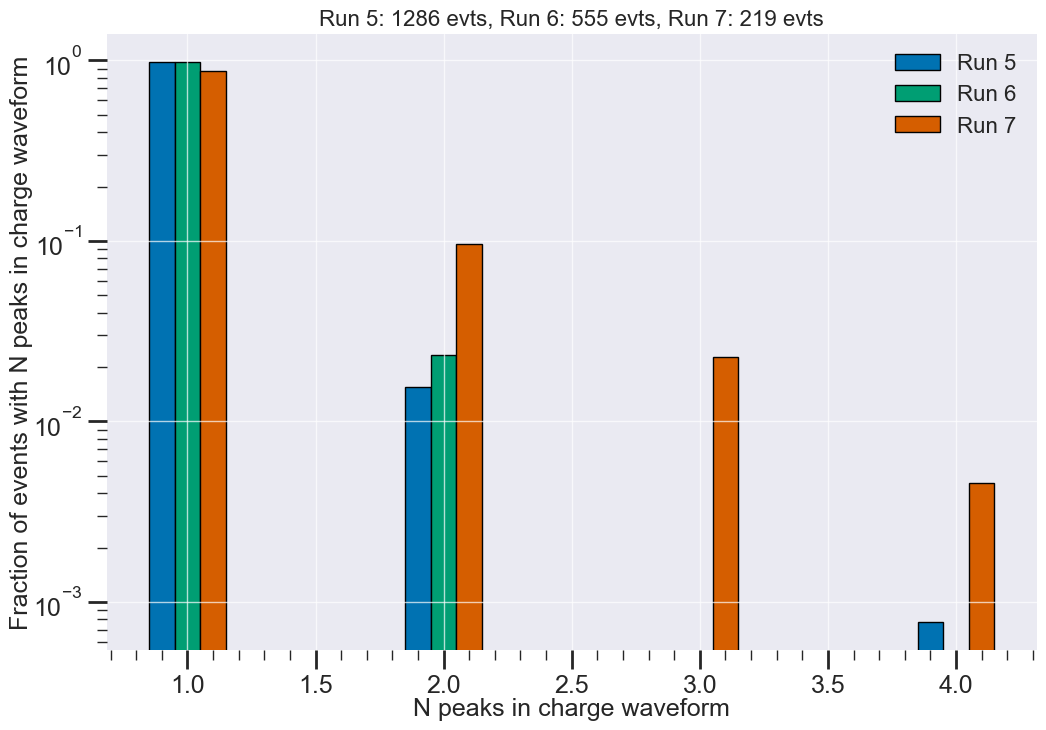

In [71]:
#Multiplicities
fig, ax = plt.subplots()
barwidth = 0.1
total_events_run = {}
for i, (run, ana) in enumerate(anas.items()):
    d = ana.df
    npeaks = np.array(d["ch3 n peaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    npeaks_set = list(set(npeaks))
    npeaks_count = {}
    total_nonzero = 0
    for n in npeaks_set:
        npeaks_count[n] = len(np.where(npeaks == n)[0])
        if(n != 0):
            total_nonzero += npeaks_count[n]
    plotlist = []
    for n in npeaks_count:
        if(n == 0): continue
        plotlist.append(npeaks_count[n]/total_nonzero)
    
    total_events_run[run] = total_nonzero


    pos = np.array([_ for _ in npeaks_count if _ != 0])
    ax.bar(pos + (i - 1)*barwidth, plotlist, barwidth, label="Run {:d}".format(run))

ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Fraction of events with N peaks in charge waveform")
ax.set_xlabel("N peaks in charge waveform")
ax.set_title("Run 5: {:d} evts, Run 6: {:d} evts, Run 7: {:d} evts".format(total_events_run[5],total_events_run[6],total_events_run[7]))
plt.show()


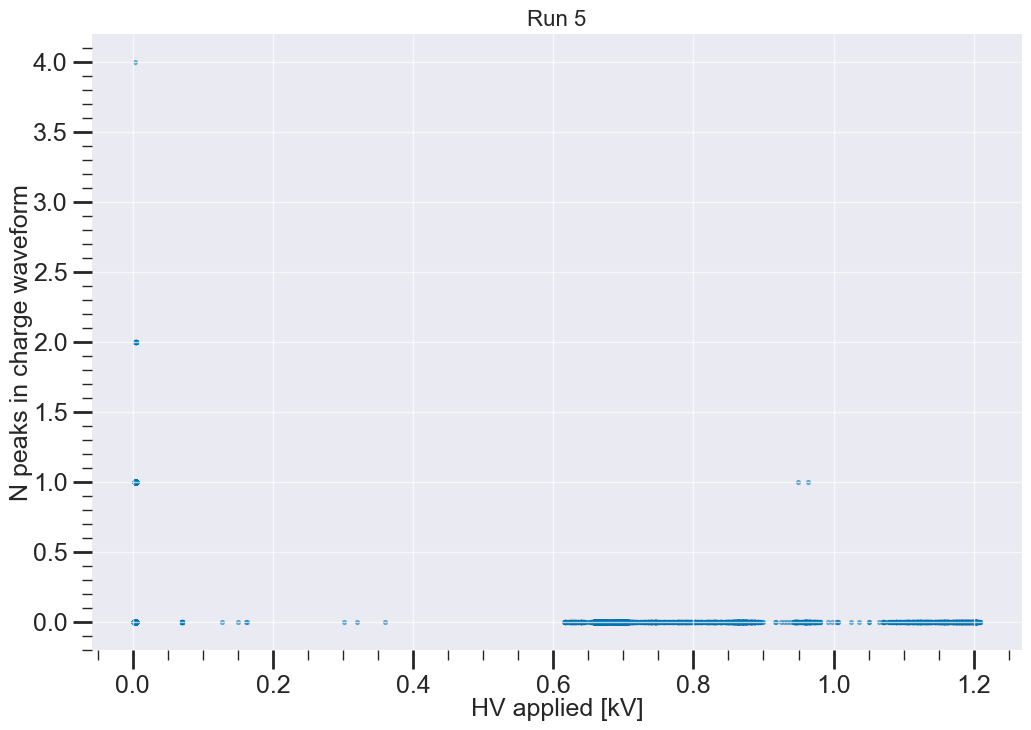

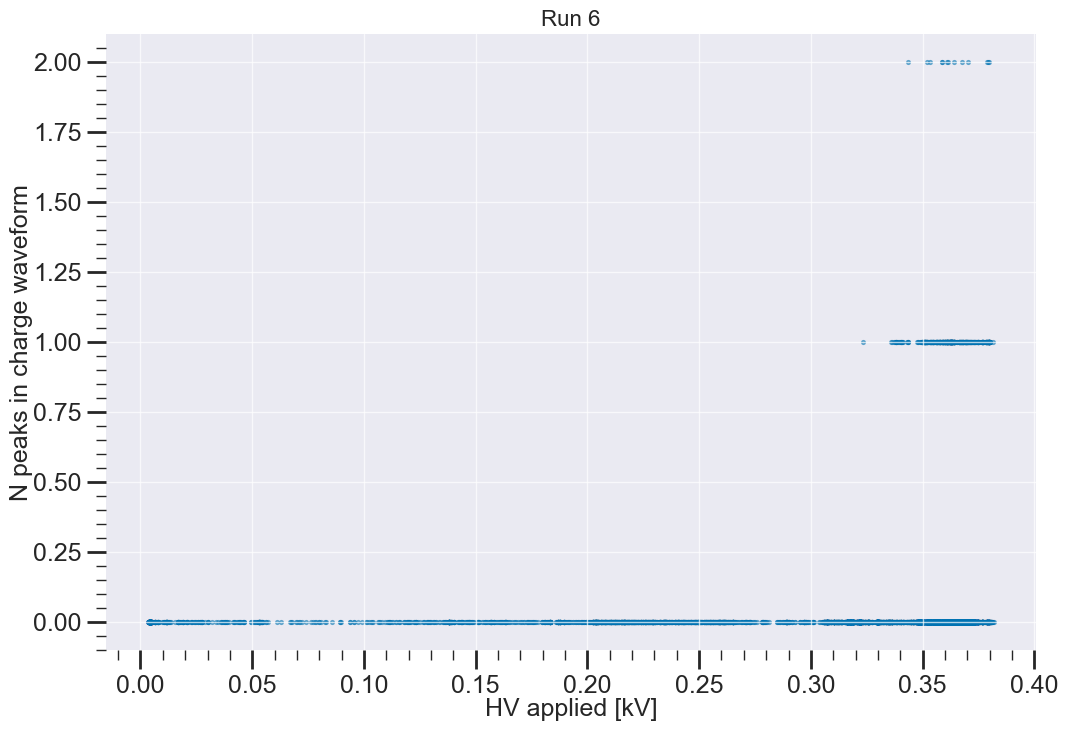

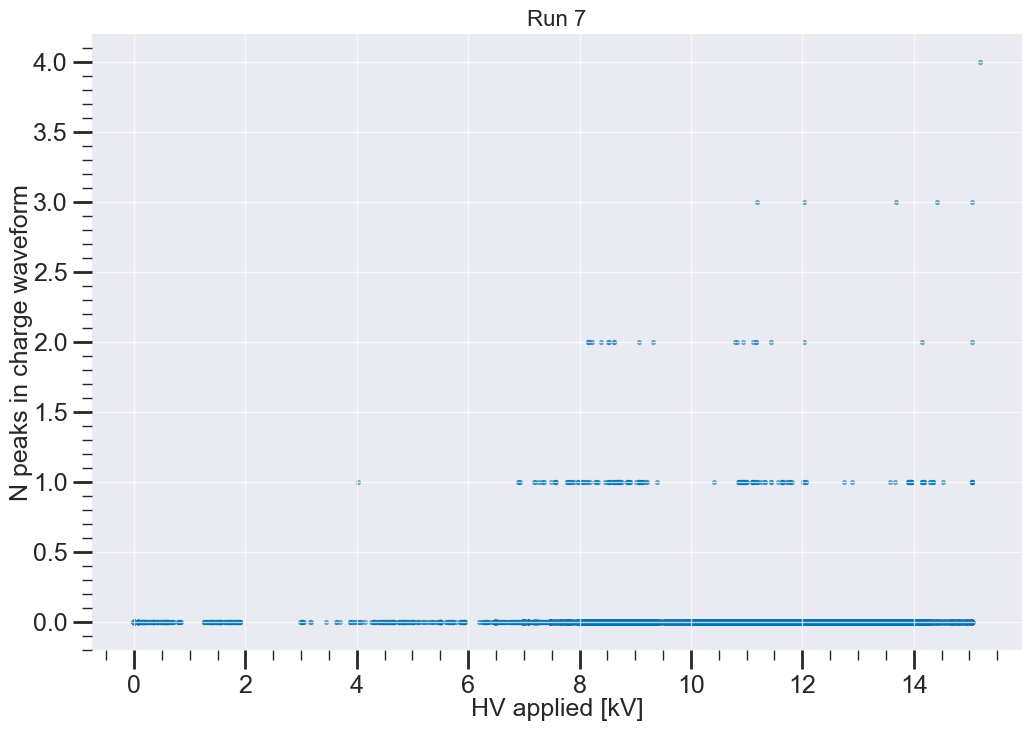

In [78]:
#Multiplicities

for i, (run, ana) in enumerate(anas.items()):
    fig, ax = plt.subplots()
    d = ana.df
    npeaks = np.array(d["ch3 n peaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    kv = np.array(d["ch3 hv"])
    kv = kv[~np.equal(kv, None)]
    ax.scatter(kv, npeaks, alpha=0.5, s=30)
    

    #ax.legend()
    ax.set_ylabel("N peaks in charge waveform")
    ax.set_xlabel("HV applied [kV]")
    ax.set_title("Run {:d}".format(run))
    #ax.set_xlim([5, 15])
    plt.show()


In [ ]:
#waveform plotting tool (not tested, need cluster where all prereduced data sits. )
for run, ana in anas.items():
    d = ana.df
    mask = (d["ch3 amp"] > 20)
    sw_chs = [3]
    events = ana.get_waveforms_from_cuts(mask, sw_chs)[3]
    fig, ax = plt.subplots()
    for ev in events:
        times = np.arange(0, ev["dT"]*1e6*len(ev["Data"][0]), ev["dT"]*1e6)
        ax.plot(times, ev["Data"][0])

    ax.legend()
    ax.set_xlabel("time [us]")
    ax.set_ylabel('[mV]')
    ax.set_title("run {:d} ({:d} events)".format(run, len(events)))
    plt.show()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

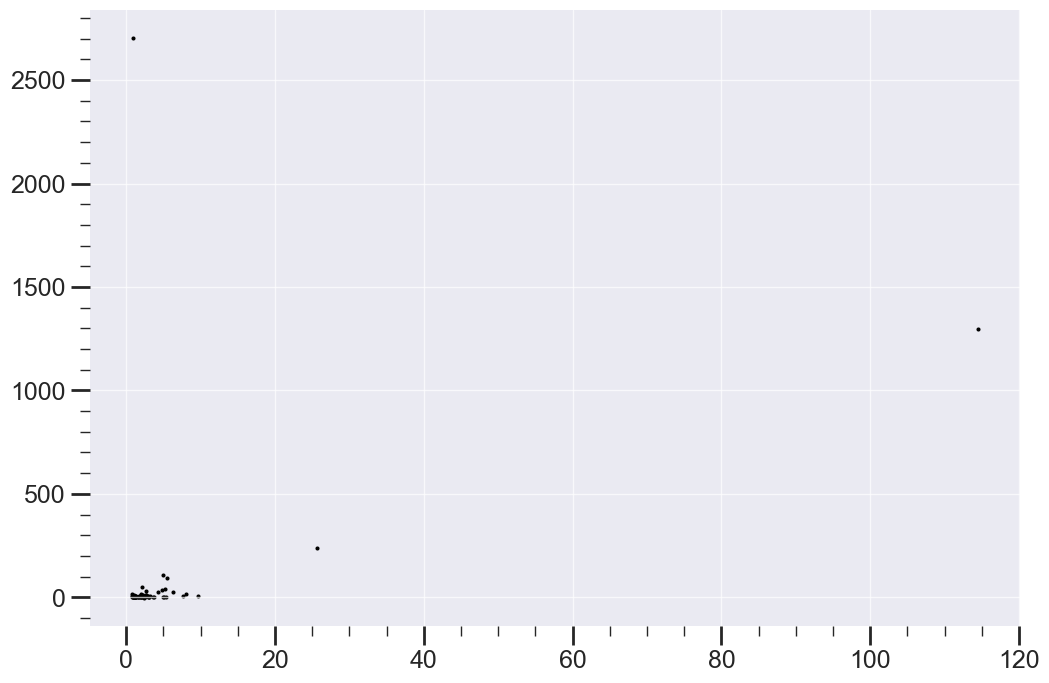

In [85]:
#get coincidence statistics
charge_thresh = 2
coinc = 0
coinc_ns = 0.3e9
for run, ana in anas.items():
    if(run != 7): continue
    d = ana.df
    mask = (d["ch3 amp"] > charge_thresh)
    target_events = d[mask]
    coinc_events = ana.get_coincidence(target_events, 3, coinc, coinc_ns)
    #combine this list of sub-dfs because I'm interested in global behavior here
    fig, ax = plt.subplots()
    for i, (_, ev) in enumerate(target_events.iterrows()):
        cev = coinc_events[i]
        #get the total sum of trigger and afterpulse integral
        cev_0 = cev[~np.equal(cev["ch0 afterpulse integral"], None)]
        cev_1 = cev[~np.equal(cev["ch1 afterpulse integral"], None)]
        ch0_sum = np.array(cev_0["ch0 trigger integral"]) + np.array(cev_0["ch0 afterpulse integral"]) - 10*np.array(cev_0["ch0 postbaseline"])
        ch1_sum = np.array(cev_1["ch1 trigger integral"]) + np.array(cev_1["ch1 afterpulse integral"]) - 10*np.array(cev_1["ch1 postbaseline"])

        ch0_sum = np.sum(ch0_sum)
        ch1_sum = np.sum(ch1_sum)
        total_light = ch0_sum + ch1_sum

        ax.scatter(ev["ch3 charge"], total_light, color='k', s=15)

    ax.set_xlabel("charge [pC]")
    ax.set_ylabel("sum of integrals of all coincident PMT signals [mV*us]")
    ax.set_title("run {:d}".format(run))
    plt.show()

    

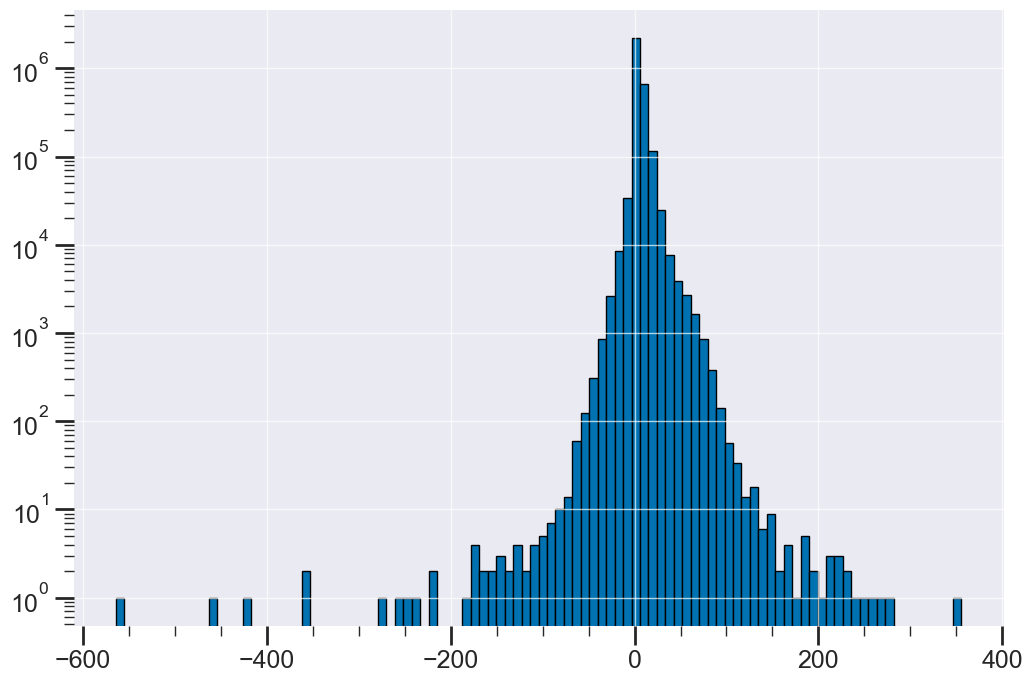

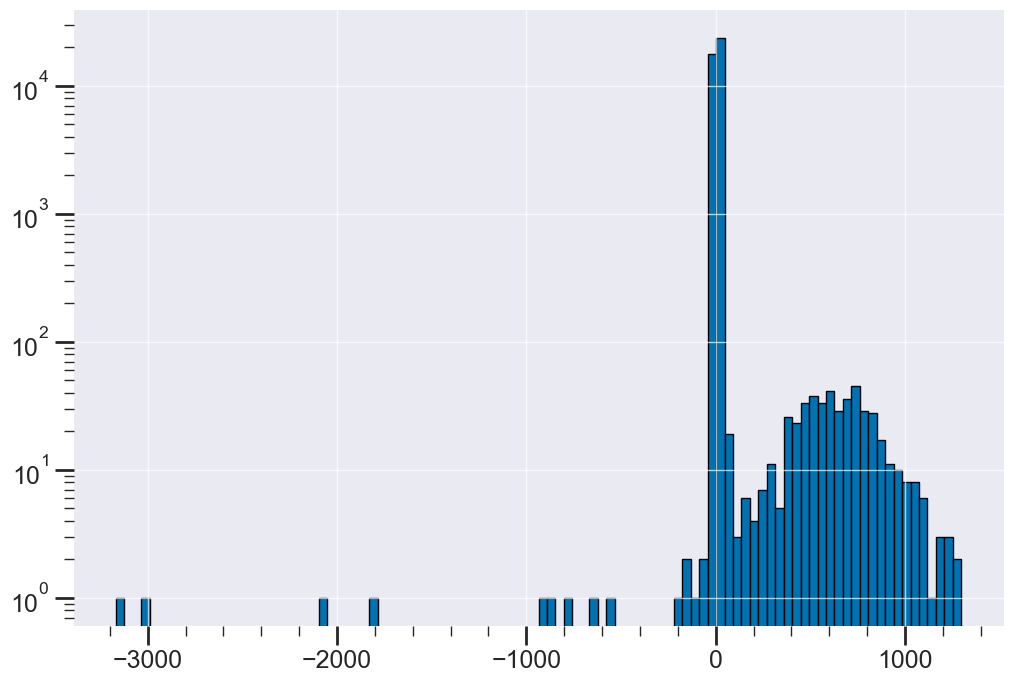

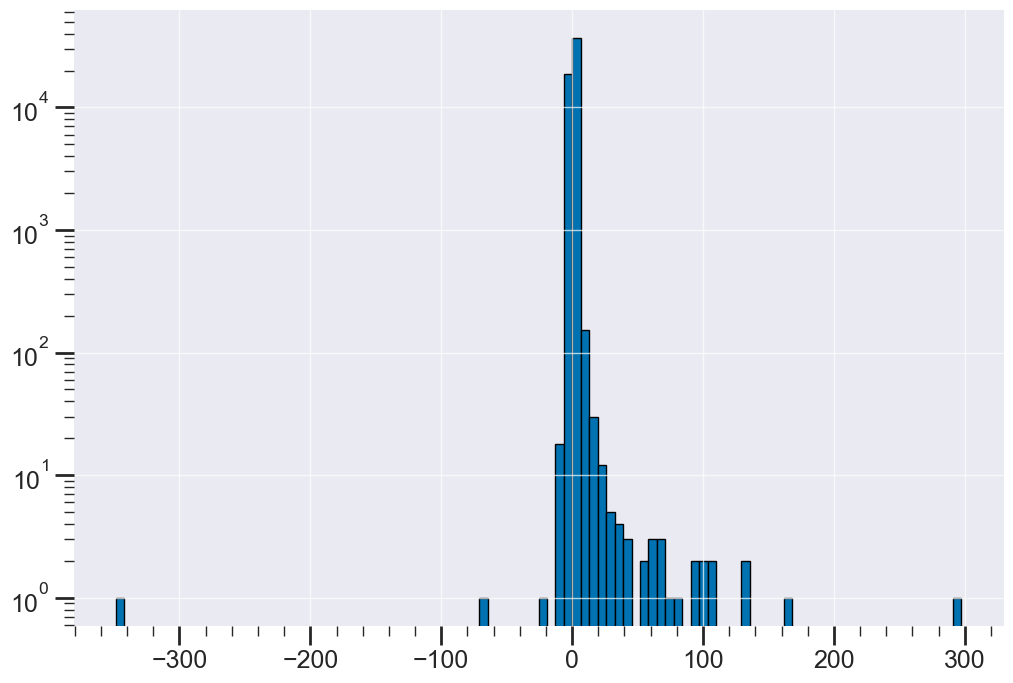

In [116]:
for run, ana in anas.items():
    d = ana.df
    ch0_int = np.array(d["ch0 afterpulse integral"])
    ch0_int = ch0_int[~np.equal(ch0_int, None)]
    ch0_base = np.array(d["ch0 postbaseline"])
    ch0_base = 7.5*ch0_base[~np.equal(ch0_base, None)]
    ch0_int = ch0_int - ch0_base

    ch1_int = np.array(d["ch1 afterpulse integral"])
    ch1_int = ch1_int[~np.equal(ch1_int, None)]
    ch1_base = np.array(d["ch1 postbaseline"])
    ch1_base = 7.5*ch1_base[~np.equal(ch1_base, None)]
    ch1_int = ch1_int - ch1_base

    total_int = ch1_int + ch0_int

    fig, ax = plt.subplots()
    ax.hist(total_int, 100)
    ax.set_yscale('log')
    plt.show()


# Attempted history plot with reduced data

/var/folders/nr/f5dqj57n2yg5k0j2_ffmgmzm0000gn/T/ipykernel_25472/550738055.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_new)


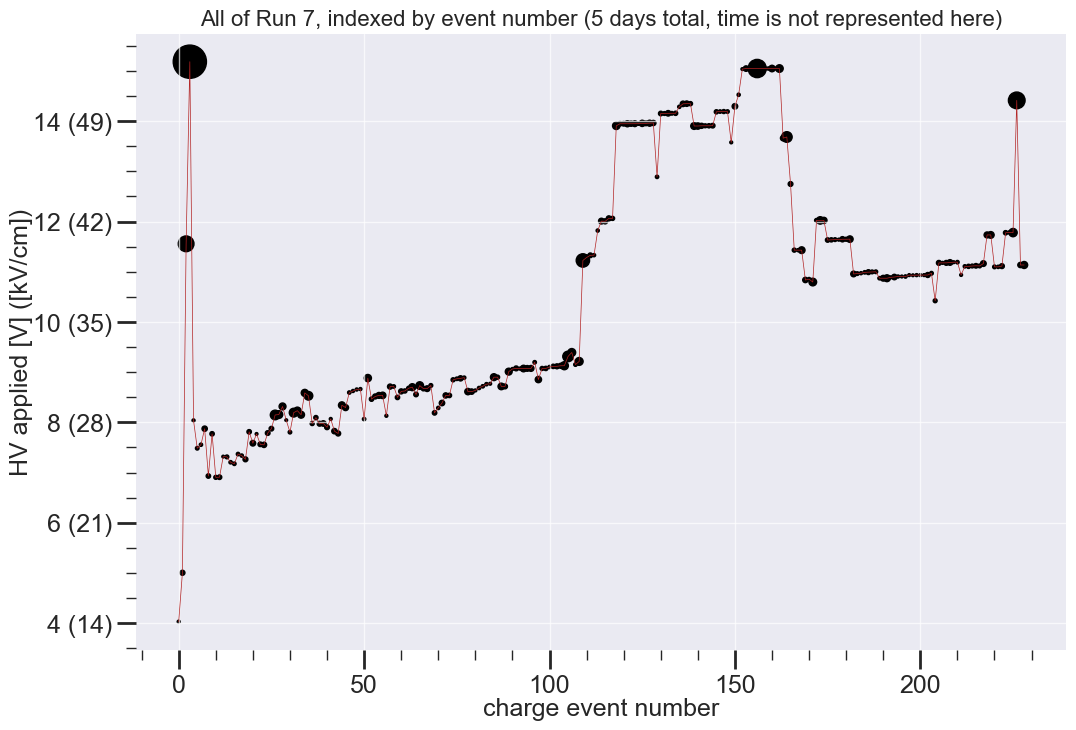

In [188]:
d = anas[7].df
fig, ax = plt.subplots()

mask = (d["ch3 amp"] > 2) & (d["ch3 amp"] != None)
d_ch = np.array(d[mask]["ch3 charge"])
d_sec = np.array(d[mask]["ch3 seconds"])
d_hv = np.array(d[mask]["ch3 hv"])
d_E = np.array(d[mask]["ch3 field"])

#recast time
d_dt = [datetime.fromtimestamp(_) for _ in d_sec]

ax.plot(range(len(d_hv)), d_hv, '-', color='firebrick', linewidth=0.5)
ax.scatter(range(len(d_hv)), d_hv, s=list(np.array(d_ch)*20), color='k')


#field values are printed alongside the same ticks on the voltage axis
gap = 0.285 #cm
yticks_old = ax.get_yticklabels()
yticks_new = []
for yt in yticks_old:
    yticks_new.append(yt.get_text() + " ({:d})".format(int(float(yt.get_text())/gap)))
ax.set_yticklabels(yticks_new)



ax.set_xlabel("charge event number")
ax.set_ylabel("HV applied [V] ([kV/cm])")
ax.set_title("All of Run 7, indexed by event number (5 days total, time is not represented here)")
plt.show()